
DataFrame con 'Country or region' como índice:
                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


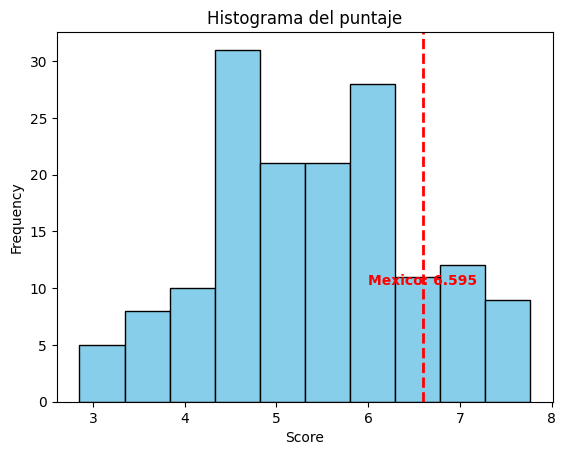

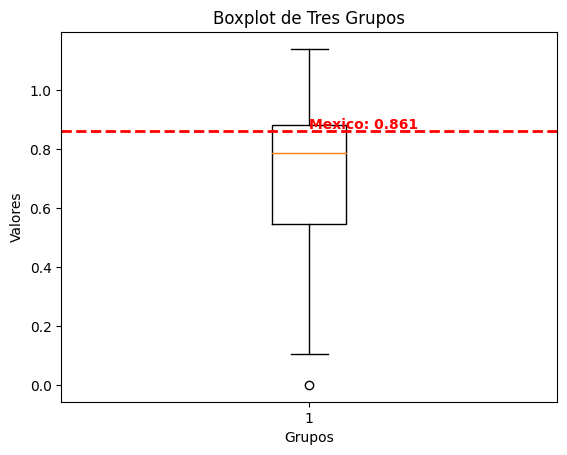

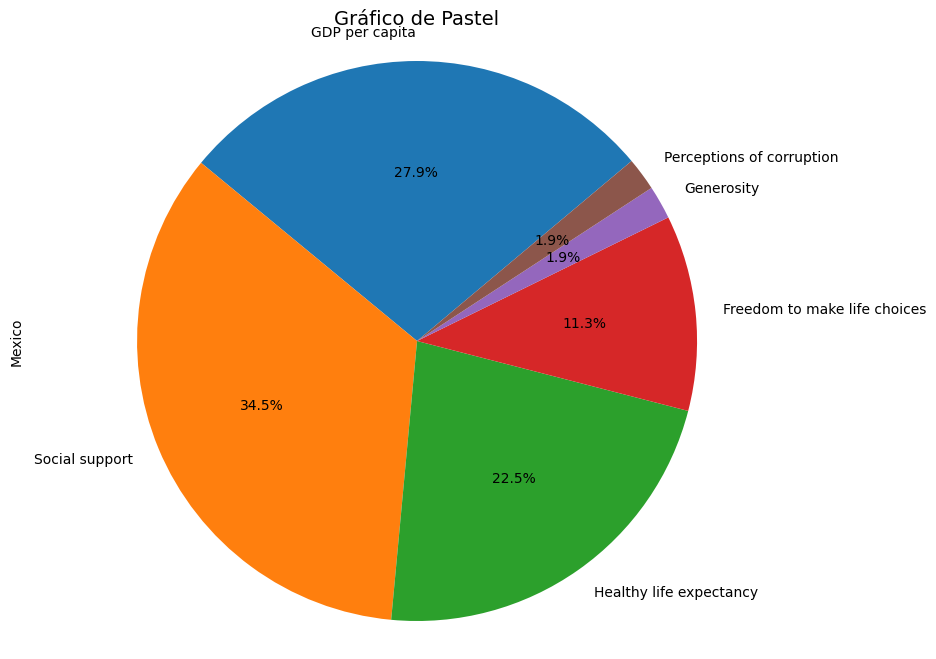

País con el puntaje más alto: Finland
País con el puntaje más bajo: South Sudan

DataFrame después de eliminar columnas:
                   GDP per capita  Social support  Healthy life expectancy  \
Country or region                                                            
Finland                     1.340           1.587                    0.986   
Mexico                      1.070           1.323                    0.861   
Argentina                   1.092           1.432                    0.881   
South Korea                 1.301           1.219                    1.036   
South Sudan                 0.306           0.575                    0.295   

                   Freedom to make life choices  Generosity  \
Country or region                                             
Finland                                   0.596       0.153   
Mexico                                    0.433       0.074   
Argentina                                 0.471       0.066   
South Korea      

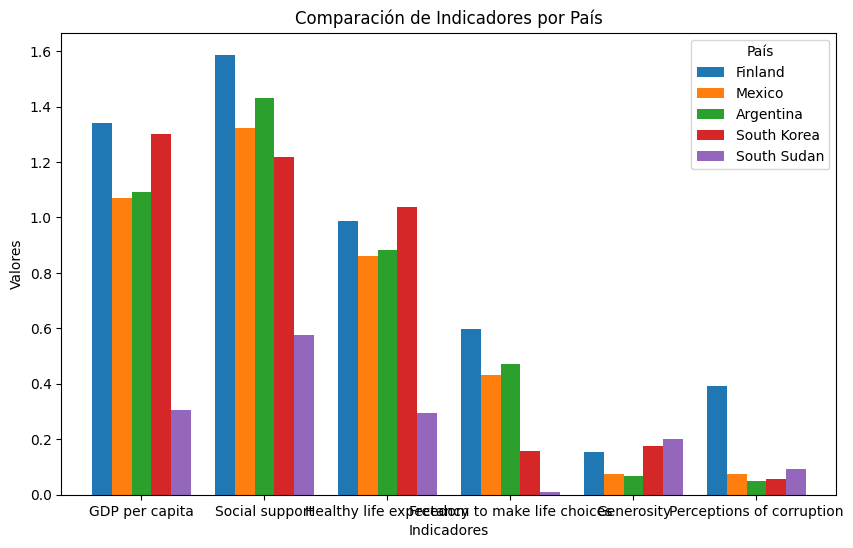

            Country or region  Score  GDP per capita  Social support  \
0                     Finland  7.769           1.340           1.587   
1                     Denmark  7.600           1.383           1.573   
2                      Norway  7.554           1.488           1.582   
3                     Iceland  7.494           1.380           1.624   
4                 Netherlands  7.488           1.396           1.522   
..                        ...    ...             ...             ...   
151                    Rwanda  3.334           0.359           0.711   
152                  Tanzania  3.231           0.476           0.885   
153               Afghanistan  3.203           0.350           0.517   
154  Central African Republic  3.083           0.026           0.000   
155               South Sudan  2.853           0.306           0.575   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.986                         0.596   

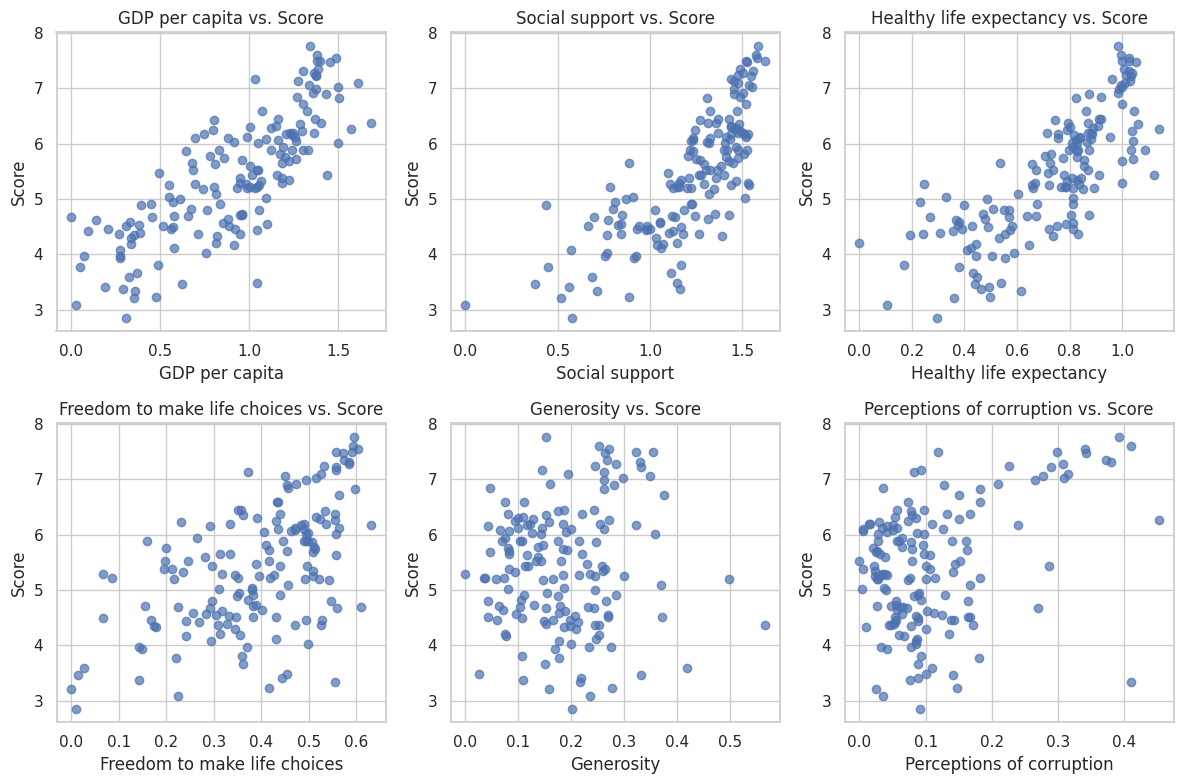

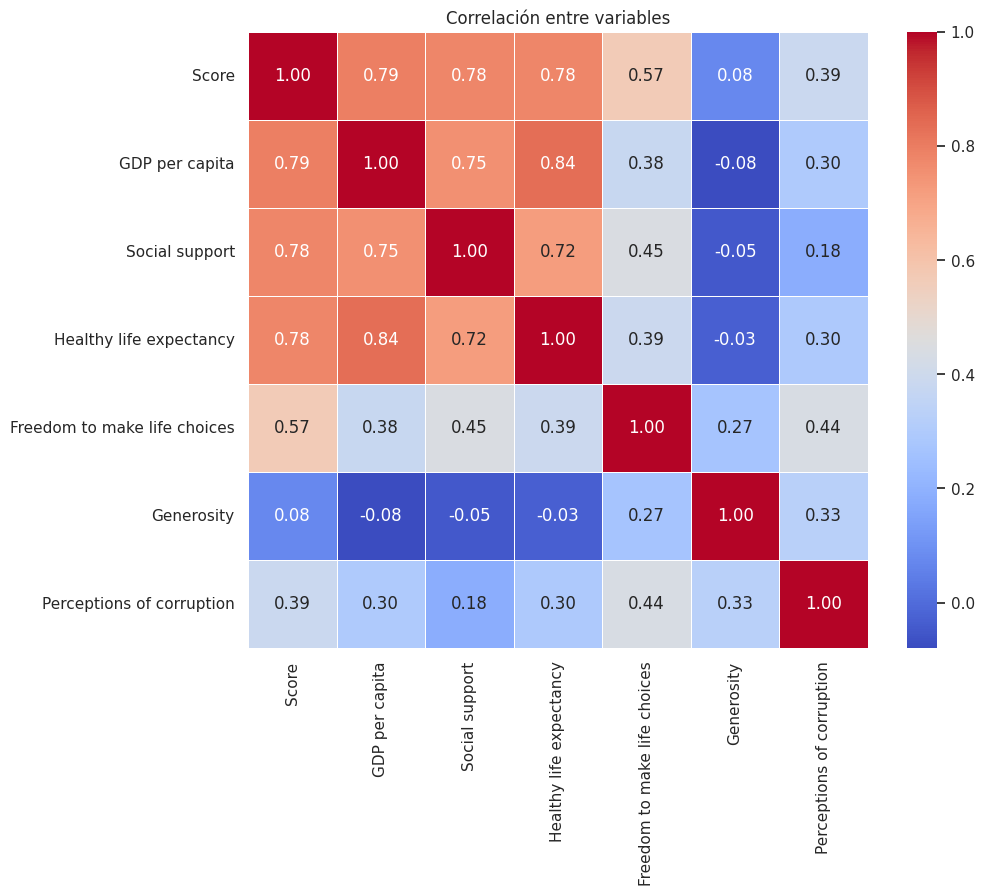

                         Region     TableName
0     Latin America & Caribbean         Aruba
1                    South Asia   Afghanistan
2            Sub-Saharan Africa        Angola
3         Europe & Central Asia       Albania
4         Europe & Central Asia       Andorra
..                          ...           ...
258       Europe & Central Asia        Kosovo
259  Middle East & North Africa   Yemen, Rep.
260          Sub-Saharan Africa  South Africa
261          Sub-Saharan Africa        Zambia
262          Sub-Saharan Africa      Zimbabwe

[263 rows x 2 columns]


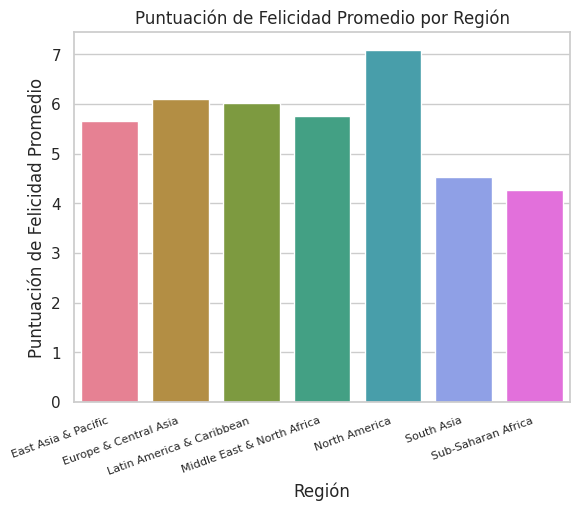

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ssl

# Desactiva la verificación del certificado SSL
ssl._create_default_https_context = ssl._create_unverified_context
# Cargar archivo
google_drive_file_id = '1PAYs3OK2_1g9fafshO7-MLmL9k3qSw1r'
google_drive_url = f'https://drive.google.com/uc?id={google_drive_file_id}'
happiness = pd.read_csv(google_drive_url)

# Filtrar solo las filas correspondientes a México y establecer 'Country or region' como índice
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

# Mostrar el DataFrame con 'Country or region' como índice
print("\nDataFrame con 'Country or region' como índice:")
print(mexico)

# Crear un histograma
plt.hist(happiness ['Score'], bins=10, color='skyblue', edgecolor='black')
# Obtener el puntaje de México
score_mexico = mexico['Score'].values[0]

# Agregar una línea vertical o marcador para identificar a México
plt.axvline(x=score_mexico, color='red', linestyle='dashed', linewidth=2, label='Mexico')
# Agregar texto a la posición de México
plt.text(score_mexico, 10, f'Mexico: {score_mexico}', color='red', ha='center', va='bottom', fontweight='bold')

# Configurar etiquetas y título
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histograma del puntaje')
plt.show()

#CREACION DE BOXPLOT
plt.boxplot(happiness ['Healthy life expectancy'],)
# Obtener el valor de 'Healthy life expectancy' para México
value_mexico = mexico['Healthy life expectancy'].values[0]

# Agregar una línea horizontal o marcador para identificar a México
plt.axhline(y=value_mexico, color='red', linestyle='dashed', linewidth=2, label='Mexico')
# Agregar texto a la posición de México
plt.text(1, value_mexico, f'Mexico: {value_mexico}', color='red', ha='left', va='bottom', fontweight='bold')

# Configurar etiquetas y título
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.title('Boxplot de Tres Grupos')

# Mostrar el boxplot
plt.show()

#grafico circular
# Filtrar solo las filas correspondientes a México y establecer 'Country or region' como índice
df_filtrado = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

# Seleccionar las columnas de interés (asegúrate de usar los nombres correctos)
columnas_interes = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df_grafico = df_filtrado[columnas_interes]


# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(10, 8))

# Configurar el gráfico de pastel
df_grafico.T.plot.pie(subplots=True, autopct='%1.1f%%', startangle=40, legend=False, ax=ax)

# Ajustar el formato del texto
ax.set_title('Gráfico de Pastel', fontsize=14)
ax.axis('equal')

plt.show()

#Filtrar datos para sacar el más feliz y el menos feliz
# Obtener el índice del país con el puntaje más alto
indice_maximo = happiness['Score'].idxmax()

# Obtener el índice del país con el puntaje más bajo
indice_minimo = happiness['Score'].idxmin()

# Obtener los nombres de los países correspondientes a los índices encontrados
pais_maximo = happiness.loc[indice_maximo, 'Country or region']
pais_minimo = happiness.loc[indice_minimo, 'Country or region']

print(f"País con el puntaje más alto: {pais_maximo}")
print(f"País con el puntaje más bajo: {pais_minimo}")

import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado happiness
paises_interes = ['Mexico', 'Finland', 'Argentina', 'South Korea', 'South Sudan']

# Crear un DataFrame solo con las filas de los países de interés
paises_seleccionados = happiness[happiness['Country or region'].isin(paises_interes)].set_index('Country or region')
columnas_a_eliminar = ['Overall rank', 'Score']
df = paises_seleccionados.drop(columnas_a_eliminar, axis=1)

# Mostrar el DataFrame después de eliminar las columnas
print("\nDataFrame después de eliminar columnas:")
print(df)

# Transponer el DataFrame para facilitar el gráfico de barras
df_transpuesto = df.T

# Crear el gráfico de barras utilizando el método plot.bar de pandas
ax = df_transpuesto.plot.bar(width=0.8, figsize=(10, 6))

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
# Agregar etiquetas y leyenda
ax.set_xlabel('Indicadores')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Indicadores por País')
ax.legend(title='País', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()


# Obtener una lista con los nombres de los factores
factores = happiness.columns.tolist()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la matriz de subgráficas de 2x3 con Seaborn
columnas_a_eliminar = ['Overall rank']
df2 = happiness.drop(columnas_a_eliminar, axis=1)
print(df2)

# Crear la matriz de subgráficas de 2 x 3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Variables
variables = ['GDP per capita', 'Social support', 'Healthy life expectancy',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# dibujar los scatter plots
for i in range(2):
    for j in range(3):
        ax = axes[i, j]
        variable = variables.pop(0)  # Tomar la primera variable de la lista
        ax.scatter(df2[variable], df2['Score'], alpha=0.7)
        ax.set_title(f'{variable} vs. Score')
        ax.set_xlabel(variable)
        ax.set_ylabel('Score')

# Ajustar el diseño de las subgráficas
plt.tight_layout()
plt.show()

# Seleccionar solo columnas numéricas
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df2[numeric_columns]

# matriz de correlación
correlation_matrix = numeric_df.corr()

# heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre variables')
plt.show()

# Cargar archivo
google_drive_file_id = '1CIx58nLou9VEfjI54vHmZLqshvoclC-2'
google_drive_url1 = f'https://drive.google.com/uc?id={google_drive_file_id}'
Metadata = pd.read_csv(google_drive_url1)


columnas_a_eliminar = ['Country Code', 'IncomeGroup', 'SpecialNotes']
df3 = Metadata.drop(columnas_a_eliminar, axis=1)
print(df3)

# Cargar archivos
#archivo_csv_metadata = r'C:\Users\NGAMEZ\Downloads\Metadata.csv'
#archivo_csv_happiness = r'C:\Users\NGAMEZ\Downloads\Happiness_report.csv'

metadata = pd.read_csv(google_drive_url1)
happiness = pd.read_csv(google_drive_url)

# Eliminar columnas innecesarias en Metadata
columnas_a_eliminar = ['Country Code', 'IncomeGroup', 'SpecialNotes']
metadata = metadata.drop(columnas_a_eliminar, axis=1)

# Concatenar por el nombre de la columna 'TableName'
df_concatenado = pd.concat([metadata.set_index('TableName'), happiness.set_index('Country or region')], axis=1)
df_concatenado.index.name = 'Country or region'

df_subset = df_concatenado[['Score', 'Region']]

# Agrupar por región y calcular el promedio de la puntuación
df_grouped = df_subset.groupby('Region')['Score'].mean().reset_index()

# Definir un mapeo de colores por región
colores = sns.color_palette("husl", n_colors=len(df_grouped['Region']))

# Crear un gráfico de barras agrupado por región con colores asignados
ax = sns.barplot(x='Region', y='Score', data=df_grouped, palette=colores)
plt.title('Puntuación de Felicidad Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Puntuación de Felicidad Promedio')

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
ax.tick_params(axis='x', labelsize=8)

plt.show()
